# **Phish in the Web**
### **RF for Demo**

Because of time constraints, we are not able to use replicate the code using Selenium WebDriver to extract webpage data. So with the code we have from **Phishing Dataset for Machine Learning** we will use internal features to train our Random Forest model for our demo, as we do not have access to third party services for the external features.

.

This has a high chance of lowering our accuracy, and we will jot down our insights below.



### **Preprocessing data**

We will be using all the internal features

In [ ]:
#import libraries only ONCE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #no one hot // all columns numeric
from sklearn.model_selection import train_test_split #data splitting

In [ ]:
#read in data & check for shape
phish_df = pd.read_csv("Phishing_Legitimate_full.csv")
phish_df.shape

(10000, 50)

In [ ]:
#specifying the columns we want to keep
selected_columns = ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
    'NumDashInHostname', 'AtSymbol','TildeSymbol', 'NumUnderscore','NumPercent',
    'NumQueryComponents','NumAmpersand','NumHash','NumNumericChars','NoHttps',
    'RandomString','IpAddress','DomainInSubdomains','DomainInPaths','HttpsInHostname','HostnameLength',
    'PathLength','QueryLength','DoubleSlashInPath','NumSensitiveWords']

#label
label_column = ['CLASS_LABEL']

In [ ]:
#features df
phishing_features_df = phish_df[selected_columns]

#label df
phishing_label_df = phish_df[label_column]

phishing_features_df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,0,0,21,44,0,0,0
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,0,17,16,103,0,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,0,27,24,0,0,0
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,0,22,50,0,0,0
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,0,10,29,0,0,0


In [ ]:
#initiate scaler
min_scaler = MinMaxScaler()

######## SCALE #########
#scale five features
phishing_features_df[selected_columns] = min_scaler.fit_transform(phishing_features_df[selected_columns])

<ipython-input-17-2b1016fee27e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_features_df[selected_columns] = min_scaler.fit_transform(phishing_features_df[selected_columns])


In [ ]:
##### SPLIT DATA ####
#split data
x_train, x_temp, y_train, y_temp = train_test_split(phishing_features_df, phishing_label_df, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.7, random_state=42)


In [ ]:
#print training data shape and label's shape
print(f"Training: Features' shape [no. of examples * feature vector size] = {x_train.shape}")
print(f"Training: Label's shape [no. of examples * 1] = {y_train.shape}\n")

#print test data shape and label's shape
print(f"Test: Features' shape [no. of examples * feature vector size] = {x_test.shape}")
print(f"Test: Label's shape [no. of examples * 1] = {y_test.shape}\n")

#print validation data shape and label's shape
print(f"Validation: Features' shape [no. of examples * feature vector size] = {x_val.shape}")
print(f"Validation: Label's shape [no. of examples * 1] = {y_val.shape}\n")


Training: Features' shape [no. of examples * feature vector size] = (7000, 25)
Training: Label's shape [no. of examples * 1] = (7000, 1)

Test: Features' shape [no. of examples * feature vector size] = (2100, 25)
Test: Label's shape [no. of examples * 1] = (2100, 1)

Validation: Features' shape [no. of examples * feature vector size] = (900, 25)
Validation: Label's shape [no. of examples * 1] = (900, 1)



### **Training RF Model**

In [ ]:
#import necessary file once
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train.values.ravel())
rf_predictions = rf_model.predict(x_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1037
           1       0.91      0.91      0.91      1063

    accuracy                           0.91      2100
   macro avg       0.91      0.91      0.91      2100
weighted avg       0.91      0.91      0.91      2100



In [ ]:
from sklearn.metrics import accuracy_score

#test accuracy
rf_test_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}")

#validation accuracy
rf_val_predictions = rf_model.predict(x_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.2f}")


Random Forest Test Accuracy: 0.91
Random Forest Validation Accuracy: 0.92


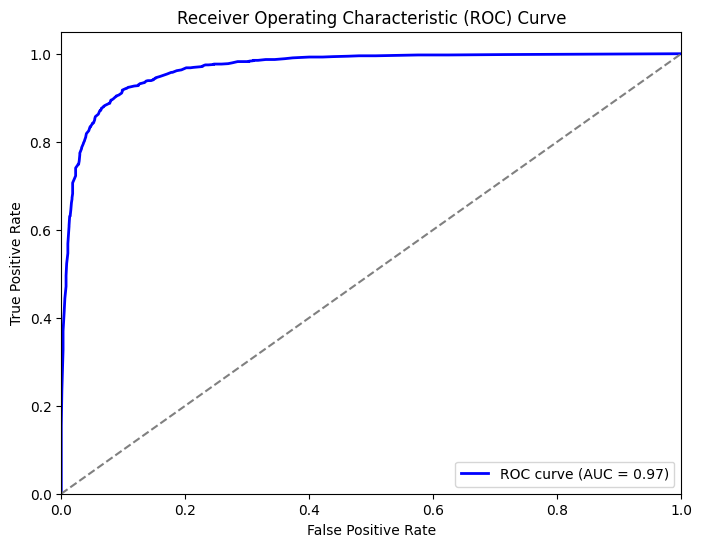

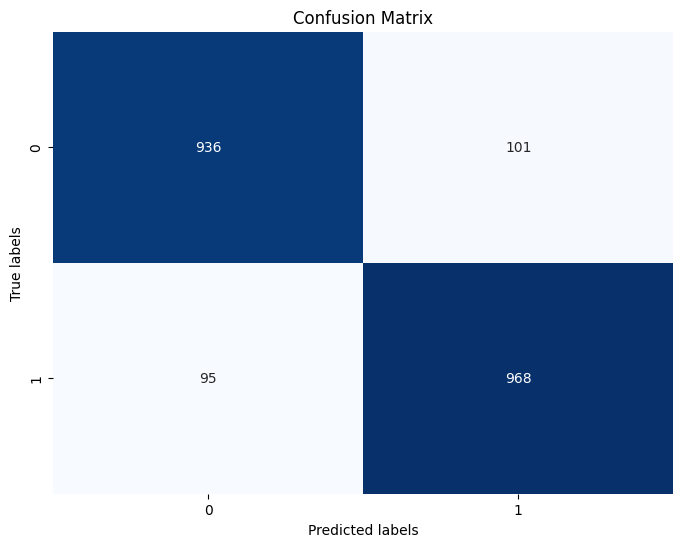

In [ ]:
#ROC Curve and ROC AUC Score
rf_probs = rf_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#save best model
import pickle

#store model
file_to_write = open("phishing_rf_model.saved","wb")
pickle.dump(rf_model,file_to_write)
file_to_write.close()

#store our test data which we may need to use later
file_to_write = open("rf_test_data.dat","wb")
pickle.dump([x_test,y_test],file_to_write)
file_to_write.close()

### **Feature Importance**

- we can still try to see which features are most prominent out of the internal features

In [ ]:
feature_importances = rf_model.feature_importances_ #getting feature importances
feature_names = x_train.columns # get feature names

#associate features w their names
feature_importance_dict = dict(zip(feature_names, feature_importances))

#sort feature importance dictionary by values (importance scores) in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

#print them
print("\nFeature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Feature Importance:
NumDash: 0.15474009850255926
NumNumericChars: 0.13723362769583275
PathLength: 0.10760507857829726
PathLevel: 0.09554914921662984
UrlLength: 0.09475827116568405
NumDots: 0.08504486831492929
HostnameLength: 0.07317519496279212
NumSensitiveWords: 0.03940815614693097
SubdomainLevel: 0.03471037521921887
QueryLength: 0.03302792398804586
NumQueryComponents: 0.029603929869061345
NumUnderscore: 0.02934628434068096
NumDashInHostname: 0.021232131655121
DomainInPaths: 0.016393245692492134
RandomString: 0.0148922844431402
NumAmpersand: 0.008602699152038781
IpAddress: 0.007999792733657014
NumPercent: 0.006850057324423594
DomainInSubdomains: 0.0032260271496785268
NoHttps: 0.0030180694416835478
TildeSymbol: 0.003001964142845036
NumHash: 0.00025136348363503577
AtSymbol: 0.00022046351285790911
DoubleSlashInPath: 0.00010894326776452197
HttpsInHostname: 0.0


# **Insight:**

top 5 important features were:

1. number of dashes

2. number of numeric characters

3. path length

4. path level

5. url length

overall, https being in host name seems like it has no impact on the model.